In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.decomposition import PCA

In [45]:
df = pd.read_excel("credit.xls", header=1)

In [46]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [47]:
df.rename({'default payment next month' : 'DEFAULT'}, axis='columns', inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [48]:
df.drop("ID", axis=1, inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [49]:
df.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
DEFAULT      int64
dtype: object

In [50]:
df.SEX.unique()

array([2, 1], dtype=int64)

In [51]:
df.EDUCATION.unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [52]:
df.MARRIAGE.unique()

array([1, 2, 3, 0], dtype=int64)

In [53]:
df_no_missing = df.loc[(df.EDUCATION != 0) & (df.MARRIAGE != 0)]

In [54]:
df_no_missing.EDUCATION.unique()

array([2, 1, 3, 5, 4, 6], dtype=int64)

In [55]:
df_no_missing.MARRIAGE.unique()

array([1, 2, 3], dtype=int64)

In [56]:
df_no_default = df_no_missing[df_no_missing['DEFAULT'] == 0]
df_default = df_no_missing[df_no_missing['DEFAULT'] == 1]

In [57]:
df_no_default_downsampled = resample(df_no_default, n_samples=1000)

In [58]:
df_default_downsampled = resample(df_default, n_samples=1000)

In [59]:
len(df_no_default_downsampled),len(df_default_downsampled)

(1000, 1000)

In [60]:
df_downsample = pd.concat([df_no_default_downsampled, df_default_downsampled])
len(df_downsample)

2000

In [61]:
X = df_downsample.drop('DEFAULT',axis=1).copy()
y = df_downsample.DEFAULT

In [62]:
X_encoded = pd.get_dummies(X, columns=['SEX',
                                      'EDUCATION',
                                      'MARRIAGE',
                                      'PAY_0',
                                       'PAY_2',
                                       'PAY_3',
                                       'PAY_4',
                                       'PAY_5',
                                       'PAY_6'
                                      ])

In [63]:
X_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
6978,170000,30,998,998,0,499,724,390,0,0,...,0,0,1,0,0,0,0,0,0,0
17795,470000,54,358581,351295,358671,367492,374249,381132,0,13033,...,0,0,0,1,0,0,0,0,0,0
10557,30000,36,6727,5023,6714,8714,9514,3300,2000,2000,...,0,0,0,1,0,0,0,0,0,0
3745,290000,39,1757,3555,2256,2830,1682,1235,3579,2262,...,0,1,0,0,0,0,0,0,0,0
4820,90000,29,88254,89080,89613,89532,90362,94337,4200,4000,...,0,0,0,1,0,0,0,0,0,0


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42, test_size=0.3)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [81]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

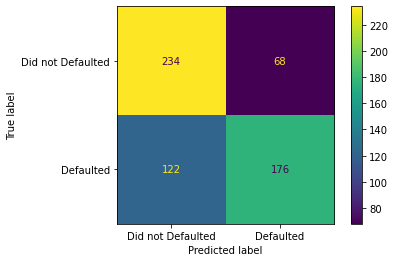

In [82]:
plot_confusion_matrix(clf_svm,
                     X_test_scaled,
                     y_test,
                     values_format='d',
                     display_labels=["Did not Defaulted", "Defaulted"])

In [83]:
clf_svm.score(X_test,y_test)

0.49666666666666665

In [84]:
param_grid = [
    {
        'C' : [0.5,1,10,100],
        'gamma' : ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
        'kernel' : ['rbf']
    }
]

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose = 0
)

optimal_params.fit(X_train_scaled,y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [85]:
clf_svm_red = SVC(C=100, gamma=0.001, kernel='rbf')

In [86]:
clf_svm_red.fit(X_train_scaled,y_train)

SVC(C=100, gamma=0.001)

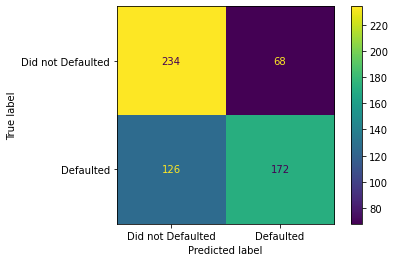

In [87]:
plot_confusion_matrix(clf_svm_red,
                     X_test_scaled,
                     y_test,
                     values_format='d',
                     display_labels=["Did not Defaulted", "Defaulted"])

In [88]:
clf_svm.score(X_test,y_test)

0.49666666666666665

In [89]:
len(df_downsample.columns)

24

In [90]:
pca = PCA()

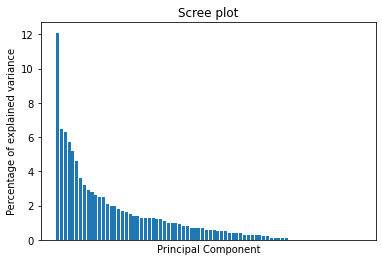

In [93]:
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = [str(x) for x in range(1,len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var)
plt.tick_params(
    axis='x',
    which='both',
    bottom = False,
    top=False,
    labelbottom = False
)
plt.xlabel("Principal Component")
plt.ylabel("Percentage of explained variance")

plt.title("Scree plot")
plt.show()

In [95]:
train_pc1_corrds = X_train_pca[:, 0]
train_pc2_corrds = X_train_pca[:, 1]

pca_trained_scaled = scale(np.column_stack((train_pc1_corrds,train_pc2_corrds)))

param_grid = [
    {
        'C':[1,10,100,1000],
        'gamma':['scale',1,0.1,0.01,0.001,0.0001],
        'kernel':['rbf'],
    }
]

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=0
)

optimal_params.fit(pca_trained_scaled, y_train)
print(optimal_params.best_params_)

{'C': 1000, 'gamma': 'scale', 'kernel': 'rbf'}


In [96]:
clf_svm_pca = SVC(random_state=42, C=1000, gamma='scale')
clf_svm_pca.fit(pca_trained_scaled, y_train)

SVC(C=1000, random_state=42)

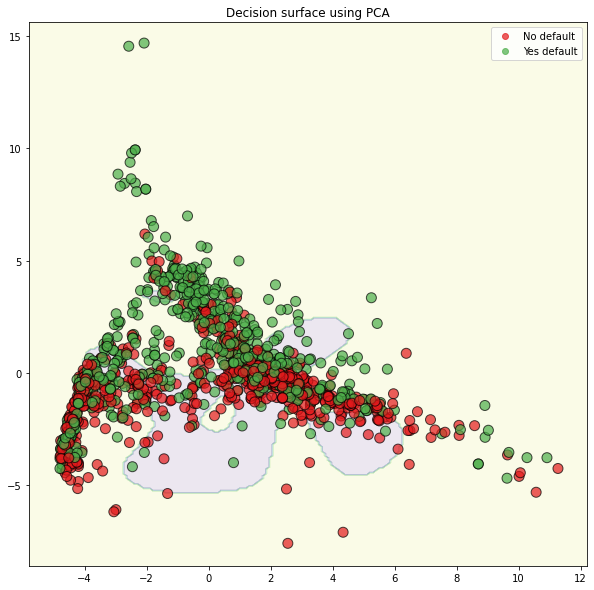

In [100]:
X_test_pca = pca.transform(X_train_scaled)

test_pc1_cords = X_test_pca[:, 0]
test_pc2_cords = X_test_pca[:, 1]

x_min = test_pc1_cords.min() - 1
x_max = test_pc1_cords.max() + 1

y_min = test_pc2_cords.min() - 1
y_max = test_pc2_cords.max() + 1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),(np.arange(start=y_min, stop=y_max, step=0.1)))
                     
Z = clf_svm_pca.predict(np.column_stack((xx.ravel(),yy.ravel())))
                     
Z = Z.reshape(xx.shape)
fig, ax = plt.subplots(figsize=(10,10))
                     
ax.contourf(xx, yy, Z, alpha=0.1)
cmap = colors.ListedColormap(['#e41a1c','#4daf4a'])
scatter = ax.scatter(test_pc1_cords,
                    test_pc2_cords,
                    c=y_train,
                    cmap=cmap,
                    s=100,
                    edgecolors = 'k',
                    alpha=0.7)
legend = ax.legend(scatter.legend_elements()[0],
                  scatter.legend_elements()[1],
                  loc="upper right")
legend.get_texts()[0].set_text("No default")
legend.get_texts()[1].set_text("Yes default")

ax.set_ylabel = ('PC2')
ax.set_xlabel = ('PC1')

ax.set_title('Decision surface using PCA')

plt.show()
